<a href="https://colab.research.google.com/github/Nitsyhftr/Penerapan-Algoritma-SWM-untuk-Memprediksi-Penyakit-Diabetes/blob/main/Prediksi_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PENERAPAN ALGORITMA SUPPORT VECTOR MACHINE (SVM) UNTUK MEMPREDIKSI PENYAKIT DIABETES**

# *Data Understanding*

*   Pengumpulan Data
---
Dataset ini diambil dari kaggle.com, Dataset ini telah berasal dari National Institute of Diabetes and Digestive and Kidney Diseases untuk memprediksi apakah pasien mengidap diabetes atau tidak. Data ini berisi informasi pasien wanita yang berumur diatas 21 tahun saja.

# *Data Preparation*

*   Import Library
---

In [ ]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn import svm



*   Import Dataset
---



In [ ]:
diabetes = pd.read_csv('diabetes.csv')



*   Analisa Variabel Data



---




In [ ]:
#memuat data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Keterangan Dataset

---
Pregnancies(kehamilan) :-  Jumlah kehamilan yang dialami pasien.

Glucose(Glukosa) :-Konsentrasi Glukosa plasma 2 jam dalam tes toleransi glukosa oral

BloodPressure(Tekanan Darah) :- Tekanan darah diastolik (mm hg)

SkinThickness :- Ketebalan lipatan kulit trisep(mm)

Insulin :- insulin serum 2 jam(mu U/ml)

BMI :- Index massa tubuh ((berat badan dalam kg/tinggi badan dalam m)^2)

Age(umur) :- Usia(tahun)

DiabetesPedigreeFunction :-skor kemungkinan diabetes berdasarkan riwayat keluarga

Outcome :- 0(tidak menderita diabetes) or 1 (menderita diabetes)


In [ ]:
#Memeriksa/ menampilkan ringkasan statistik deskriptif dari dataset diabetes
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pengamatan

---
Dapat dilihat bahwa Bloodpressure(tekanan darah) berkisar antara 0 hingga 122, hal ini tidak masuk akal karena tekanan darah tidak boleh 0.


In [ ]:
def perbandingan():
  trace = go.Pie(labels = ['healthy', 'diabetes'], values = diabetes['Outcome'].value_counts(), textfont=dict(size=15), opacity = 0.8, marker=dict(colors=['darkblue', 'maroon'], line=dict(color='#000000', width=1.5)))
  layout=dict(title='Distribution of Outcome variable')
  fig=dict(data = [trace], layout=layout)
  py.iplot(fig)

In [ ]:
perbandingan()



*   mengatasi column dengan value 0

---





In [ ]:
features = diabetes.columns
cols = (diabetes[features] == 0).sum()
print(cols)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Kami tidak dapat menghilangkan value 0 pada column pregnancies dan outcome. Jadi kami fokus ke column yang lain

In [ ]:
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#pertama atasi nilai glucose, bloodpressure, dan BMI
#mengganti value 0 dengan median(nilai tengah) column tersebut

diabetes['Glucose'].fillna(diabetes['Glucose'].median(), inplace =True)

diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].median(), inplace =True)

diabetes['BMI'].fillna(diabetes['BMI'].median(), inplace =True)

In [ ]:
#kedua, mengatasi nilai insulin berdasarkan nilai mean(rata-rata) column glucose
by_Glucose_Age_Insulin_Grp = diabetes.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
diabetes['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)

diabetes['Insulin'] = diabetes['Insulin'].fillna(diabetes['Insulin'].mean())

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local

In [ ]:
#terakhir, mengatasi nilai skinthickness berdasarkan BMI karena saling berhubungan
by_BMI_Insulin = diabetes.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
diabetes['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].mean(),inplace= True)

In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing value/NaN atau value bernilai 0 telah teratasi



*   Memeriksa Statistik data


---





In [ ]:
#setelah itu, melihat lebih dalam histrogram pada masing-masing fitur
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Distribution of Pregnancies</b>',
                                                    '<b>Distribution of Glucose</b>',
                                                    '<b>Distribution of Blood Pressure</b>',
                                                    '<b>Distribution of Skin Thickness</b>',
                                                    '<b>Distribution of Insulin</b>',
                                                    '<b>Distribution of BMI</b>',
                                                    '<b>Distribution of Diabetes Pedigree Func.</b>',
                                                    '<b>Distribution of Age</b>'
                                                   ))

fig.add_trace(go.Histogram(x=diabetes['Pregnancies']), row=1, col=1)
fig.add_trace(go.Histogram(x=diabetes['Glucose']), row=1, col=2)
fig.add_trace(go.Histogram(x=diabetes['BloodPressure']), row=1, col=3)
fig.add_trace(go.Histogram(x=diabetes['SkinThickness']), row=1, col=4)
fig.add_trace(go.Histogram(x=diabetes['Insulin']), row=2, col=1)
fig.add_trace(go.Histogram(x=diabetes['BMI']), row=2, col=2)
fig.add_trace(go.Histogram(x=diabetes['DiabetesPedigreeFunction']), row=2, col=3)
fig.add_trace(go.Histogram(x=diabetes['Age']), row=2, col=4)


# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1000,
    height=400,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

Pengamatan

---
Dapat dilihat pada column glucose dan BMI mempunyai distribusi mendekati normal dan fitur lain sangat condong ke ujung kiri distribusi.


<Axes: >

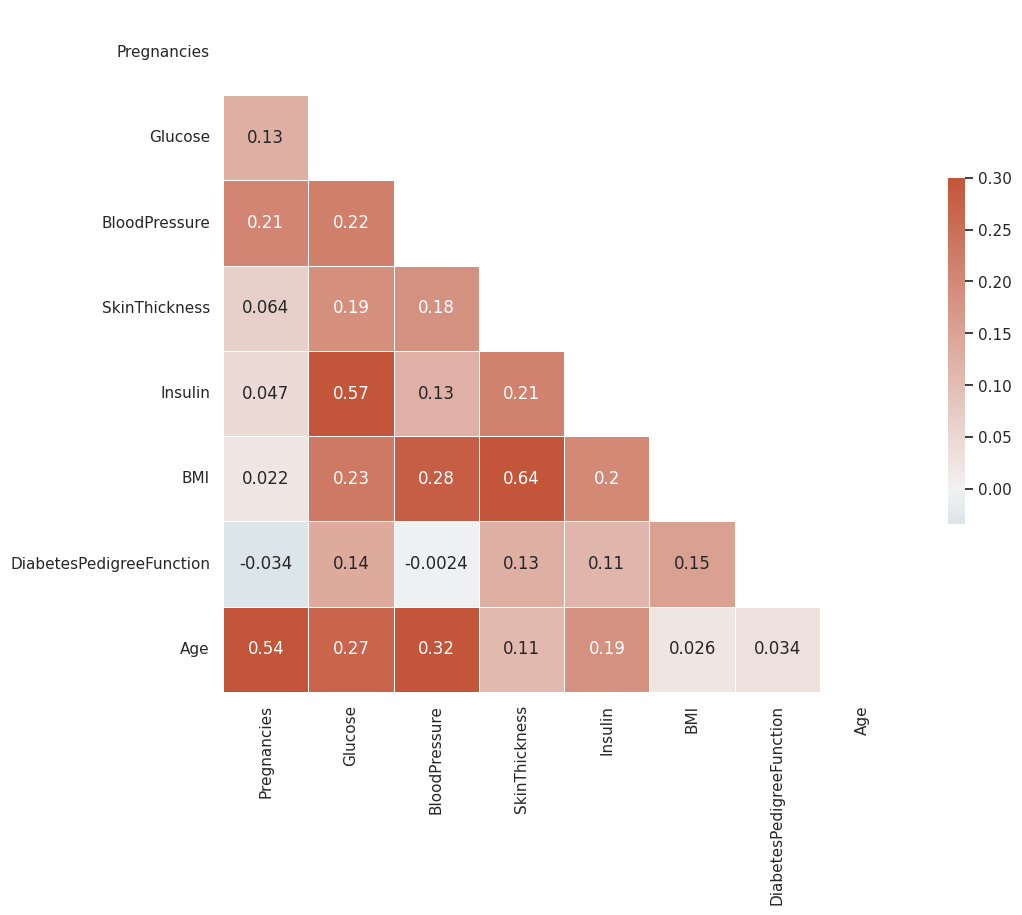

In [ ]:
sns.set_theme(style="white")

# membuat dataframe tanpa column outcome
d = diabetes.drop(['Outcome'], axis=1)

# hitung matriks korelasi untuk fitur numerik
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Pengamatan


---
dapat dilihat tidak ada pasangan variabel fitur yang berkorelasi tinggi dalam dataset. Selain itu, terdapat korelasi tingkat menengah antara age(usia) dan pregnancies(kehamilan) hanya mendukung intuisi umum bahwa wanita memiliki peluang lebih besar untuk tingkat jumlah kehamilan lebih tinggi seiring bertambahnya usia.


In [ ]:
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Outcome vs. Pregnancies</b>',
                                                    '<b>Outcome vs. Glucose</b>',
                                                    '<b>Outcome vs. Blood Pressure</b>',
                                                    '<b>Outcome vs. Skin Thickness</b>',
                                                    '<b>Outcome vs. Insulin</b>',
                                                    '<b>Outcome vs. BMI</b>',
                                                    '<b>Outcome vs. Diabetes Pedigree Func.</b>',
                                                    '<b>Outcome vs. Age</b>'
                                                   ))

fig.add_trace(go.Box(y=diabetes['Pregnancies'], x=diabetes['Outcome']), row=1, col=1)
fig.add_trace(go.Box(y=diabetes['Glucose'], x=diabetes['Outcome']), row=1, col=2)
fig.add_trace(go.Box(y=diabetes['BloodPressure'], x=diabetes['Outcome']), row=1, col=3)
fig.add_trace(go.Box(y=diabetes['SkinThickness'], x=diabetes['Outcome']), row=1, col=4)
fig.add_trace(go.Box(y=diabetes['Insulin'], x=diabetes['Outcome']), row=2, col=1)
fig.add_trace(go.Box(y=diabetes['BMI'], x=diabetes['Outcome']), row=2, col=2)
fig.add_trace(go.Box(y=diabetes['DiabetesPedigreeFunction'], x=diabetes['Outcome']), row=2, col=3)
fig.add_trace(go.Box(y=diabetes['Age'], x=diabetes['Outcome']), row=2, col=4)


# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1000,
    height=400,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

Pengamatan


---

Dapat dilihat fitur glucose, insulin, BMI, diabetes pedigree dan age mempunyai pengaruh paling besar terhadap terjadinya diabetes. Kemudian, dampak skin thickness tidak mempunyai dampak signifikan terhadap terjadinya penyakit diabetes. Selain itu, faktor stress pada wanita (yang diwujudkan melalui tingkat blood pressure dan pregnancies) memiliki dampak sedang hingga rendah terhadap outcome.

# *Modelling*

In [ ]:
# memisahkan fitur-fitur dan atribut
x =diabetes.drop (columns="Outcome", axis=1)

y = diabetes["Outcome"]

In [ ]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000  277.500000  33.6   
1              1     85.0           66.0      29.000000   49.000000  26.6   
2              8    183.0           64.0      28.614922  148.888587  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000  158.000000  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      27.000000  120.000000  30.1   
767            1     93.0           70.0      31.000000   82.000000  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64




*   Standarisasi data



---



In [ ]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [ ]:
standarized_data = scaler.transform(x)
print(standarized_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]


In [ ]:
x = standarized_data
y = diabetes["Outcome"]
print(x)
print(y)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


* Memisahkan data training dan data testing

---



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify=y, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


* membuat data latih menggunakan algoritma SVM

---



In [ ]:
classifier =svm.SVC(kernel="linear")
classifier.fit(x_train, y_train)

SVC(kernel='linear')

* membuat model evaluasi untuk Mengukur akurasi

---



In [ ]:
from sklearn.metrics import accuracy_score
x_train_prediction = classifier.predict(x_train)
traning_data_accuracy = accuracy_score(x_train_prediction, y_train)
print("Akurasi data traning:", traning_data_accuracy)

Akurasi data traning: 0.7768729641693811


In [ ]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print("Akurasi Data Testing adalah= ", test_data_accuracy)

Akurasi Data Testing adalah=  0.7597402597402597


* Membuat Model Prediksi



---



In [ ]:
input_data = (6,	148,	72,	35,	0,	33.6,	0.627,	50)
input_dataArray =np.array(input_data)
data_reshape =input_dataArray.reshape(1,-1)
std_data =scaler.transform(data_reshape)

print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0 ):
    print("Pasien tidak terkena diabetes")

else :
    print("Pasien terkena diabetes")

[[ 0.63994726  0.86604475 -0.03198993  0.66220551 -1.48284948  0.16661938
   0.46849198  1.4259954 ]]
[1]
Pasien terkena diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

